In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1 as ff1

ff1.Cache.enable_cache('cache')

import warnings
warnings.filterwarnings('ignore')
# ignore info messages
import logging
logging.getLogger('fastf1').setLevel(logging.ERROR)

In [2]:
race_1 = ff1.get_session(2021, 'Monaco', 'R')

laps = race_1.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Monaco Grand Prix - Race [v2.1.12]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['6', '33', '44', '3', '77', '5', '99', '7', '14', '55', '47', '9', '18', '4', '63', '31', '11', '22', '16', '10']


In [3]:
laps_data, stream_data = ff1.api.timing_data(race_1.api_path)
app_data = ff1.api.timing_app_data(race_1.api_path)

api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data


In [4]:
app_data.query('Driver == "31"').iloc[3:20].drop(columns=['LapCountTime', 'StartLaps', 'Outlap'])

,LapNumber,Driver,LapTime,Stint,TotalLaps,Compound,New,TyresNotChanged,Time,LapFlags
62,2.0,31,0 days 00:01:20.154000,0,NaN,None,None,None,0 days 00:35:51.209000,1.0
92,3.0,31,0 days 00:01:19.421000,0,NaN,None,None,None,0 days 00:37:05.565000,NaN
96,NaN,31,NaT,0,3.0,None,None,None,0 days 00:37:05.940000,NaN
132,4.0,31,0 days 00:01:18.494000,0,NaN,None,None,None,0 days 00:38:24.008000,NaN
136,NaN,31,NaT,0,4.0,None,None,None,0 days 00:38:25.951000,NaN
171,5.0,31,NaT,0,NaN,None,None,None,0 days 00:39:42.570000,NaN
173,NaN,31,NaT,0,5.0,None,None,None,0 days 00:39:45.937000,NaN
210,NaN,31,NaT,0,6.0,None,None,None,0 days 00:41:05.970000,NaN
246,NaN,31,NaT,0,7.0,None,None,None,0 days 00:42:20.948000,NaN
282,8.0,31,0 days 00:01:17.967000,0,NaN,None,None,None,0 days 00:43:37.668000,NaN


Text(0.5, 1.0, 'Number of samples per data type')

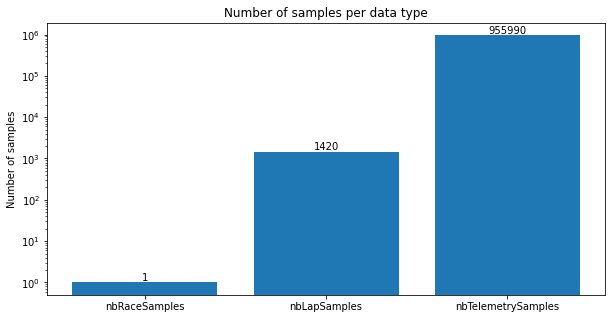

In [5]:
nbRaceSamples = 1

nbLapSamples = len(laps)

nbTelemetrySamples = 0

for driver in race_1.drivers:
    nbTelemetrySamples += len(laps.pick_driver(driver).get_telemetry())
    
fig, ax = plt.subplots(figsize=(10, 5))


ax.bar(
    x=["nbRaceSamples", "nbLapSamples", "nbTelemetrySamples"],
    height=[nbRaceSamples, nbLapSamples, nbTelemetrySamples],
    log=True,
)

ax.bar_label(ax.containers[0], fmt="%d")
ax.set_ylabel("Number of samples")
ax.set_title("Number of samples per data type")

#plt.savefig(format='svg', fname='nbSamples.svg')

In [83]:
race_2 = ff1.get_session(2021, 'Silverstone', 'R')

laps_2 = race_2.load_laps(with_telemetry=True)

laps_2.pick_driver('OCO').columns

core           INFO 	Loading laps for British Grand Prix - Race [v2.1.12]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['6', '33', '44', '3', '77', '5', '99', '7', '14', '55', '47', '9', '18', '4', '63', '31', '11', '22', '16', '10']


Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'Compound', 'TyreLife',
       'FreshTyre', 'LapStartTime', 'Team', 'Driver', 'TrackStatus',
       'IsAccurate', 'LapStartDate'],
      dtype='object')

In [87]:
def plot_all_telemetry(tele):
    fig, ax = plt.subplots(3, 2, figsize=(10, 10), sharex=True)
    ax[0, 0].plot(tele['Speed'])
    ax[0, 0].set_title('Speed')
    ax[0, 0].set_ylabel('km/h')
    ax[0, 1].plot(tele['RPM'])
    ax[0, 1].set_title('RPM')
    ax[0, 1].set_ylabel('Rotation per minute')
    ax[1, 1].plot(tele['Throttle'])
    ax[1, 1].set_title('Throttle')
    ax[1, 1].set_ylabel('Percentage of throttle')
    ax[1, 0].plot(tele['Brake'])
    ax[1, 0].set_title('Brake')
    ax[1, 0].set_ylabel('Percentage of brake')
    ax[2, 0].plot(tele['DRS'])
    ax[2, 0].set_title('DRS')
    ax[2, 0].set_ylabel('DRS Status')
    ax[2, 0].set_xlabel('Sample')
    ax[2, 1].plot(tele['nGear'])
    ax[2, 1].set_title('Gear')
    ax[2, 1].set_ylabel('Gear')
    ax[2, 1].set_xlabel('Sample')
    plt.tight_layout()
    plt.savefig(format='svg', fname='telemetry_example.svg')
    plt.show()

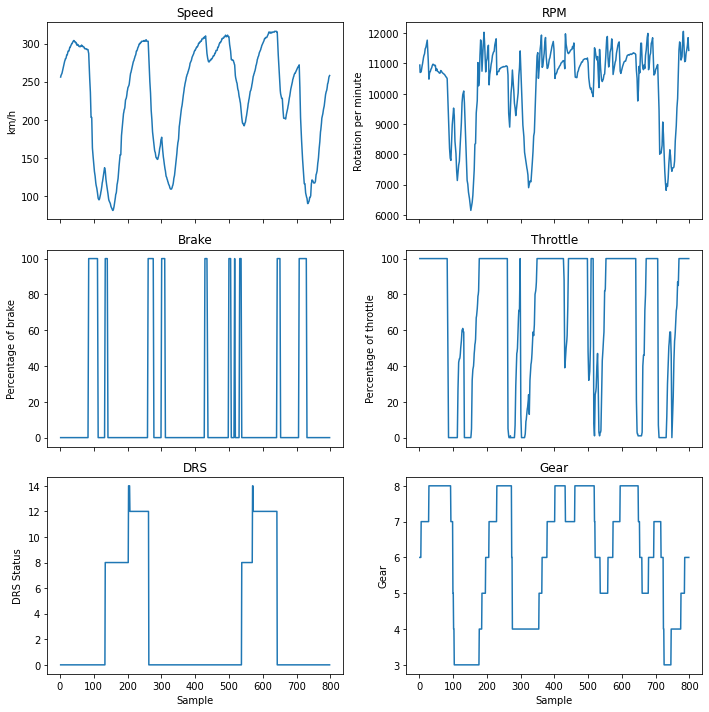

In [88]:
tele = laps_2.pick_driver('SAI').pick_fastest().get_telemetry()
plot_all_telemetry(tele)

In [279]:
race_3 = ff1.get_session(2021, 'Dutch', 'R')

laps_3 = race_3.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Dutch Grand Prix - Race [v2.1.12]
api            INFO 	Updating cache for timing_data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Cache updated!
api            INFO 	Updating cache for timing_app_data...
api            INFO 	Fetching timing app data...
api            INFO 	Cache updated!
core           INFO 	Processing timing data...
api            INFO 	Updating cache for driver_info...
api            INFO 	Fetching driver list...
api            INFO 	Cache updated!
api            INFO 	Updating cache for session_status_data...
api            INFO 	Fetching session status data...
api            INFO 	Cache updated!
api            INFO 	Updating cache for track_status_data...
api            INFO 	Fetching track status data...
api            INFO 	Cache updated!
api            INFO 	Updating cache for car_data...
api            INFO 	Fetching car data...
api            INFO 	Parsin

In [387]:
def add_fuel_load(laps):
    FUEL_START = 110
    FUEL_END = 0
    laps['FuelLoad'] = FUEL_START - laps['LapNumber'] * (FUEL_START - FUEL_END) / 72
    laps['FuelUsed'] = FUEL_START - laps['FuelLoad']
    return laps

def add_fuel_corrected_laptime(laps):
    laps['FuelCorrectedLapTime'] = laps.apply(lambda x: x['LapTime'] + pd.Timedelta(seconds=(x['FuelUsed'] * 0.025)), axis=1)
    return laps

def get_corrected_laptime_by_lapNumber(laps, compound):
    l = laps.pick_wo_box().pick_tyre(compound).pick_track_status("1")
    l = add_fuel_load(l)
    l = add_fuel_corrected_laptime(l)
    l.dropna(subset=['FuelCorrectedLapTime'], inplace=True)
    return l.groupby('TyreLife')['FuelCorrectedLapTime'].mean().apply(lambda x: x.total_seconds())

In [388]:
laps_analysed = laps_3.pick_team('Ferrari')

hards_laps = get_corrected_laptime_by_lapNumber(laps_analysed, "HARD")
#mediums_laps = get_corrected_laptime_by_lapNumber(laps_analysed, "MEDIUM")
softs_laps = get_corrected_laptime_by_lapNumber(laps_analysed, "SOFT")

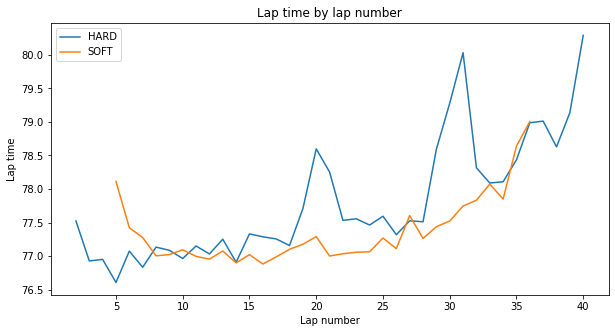

In [389]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(hards_laps, label="HARD")
#ax.plot(mediums_laps, label="MEDIUM")
ax.plot(softs_laps, label="SOFT")

ax.set_xlabel("Lap number")
ax.set_ylabel("Lap time")
ax.set_title("Lap time by lap number")
ax.legend()

In [390]:
driver_1_laps = add_fuel_corrected_laptime(add_fuel_load(laps_3.pick_driver('HAM').pick_wo_box().pick_track_status("1")))
driver_2_laps = add_fuel_corrected_laptime(add_fuel_load(laps_3.pick_driver('RUS').pick_wo_box().pick_track_status("1")))

<AxesSubplot:xlabel='LapNumber'>

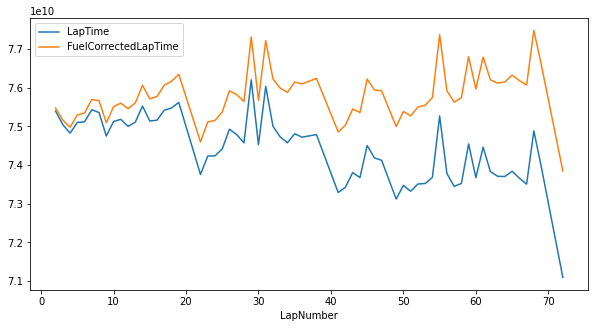

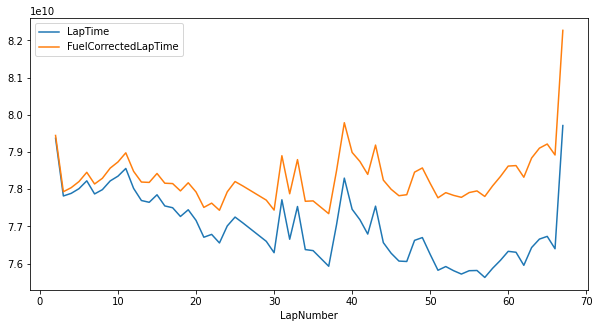

In [391]:
driver_1_laps.plot(x='LapNumber', y=['LapTime', 'FuelCorrectedLapTime'], figsize=(10, 5))
driver_2_laps.plot(x='LapNumber', y=['LapTime', 'FuelCorrectedLapTime'], figsize=(10, 5))